# Chapter09 Tree regression

真实数据的结构往往是复杂且不一定呈现线性关系，这种时候使用全局线性模型就比较困难。一种可行的解决方法是使用树回归将数据集切分成很多份易建模的数据进行建模。

CART（Classification And Regression Trees, 分类回归树）是一种树结构算法。它使用二元切分来构建数据。

首先，构建二元切分函数 `binSplitDataSet()`，需要输入三个参数，`dataSet` 为待切分数据集，`feature` 是用于切分的特征，`value` 切分依据的特征值

```python
def binSplitDataSet(dataSet, feature, value):
    mat0 = dataSet[nonzero(dataSet[:,feature] > value)[0],:][0]
    mat1 = dataSet[nonzero(dataSet[:,feature] <= value)[0],:][0]
    return mat0,mat1
```

构建一个简单的单元矩阵演示二元切分。

In [46]:
import regTrees
from numpy import *
testMat = mat(eye(4))
testMat

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [47]:
mat0, mat1 = regTrees.binSplitDataSet(testMat, 1, 0.5)
mat0

matrix([[0., 1., 0., 0.]])

In [15]:
mat1

matrix([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

`binSplitDataSet(testMat, 1, 0.5)` 以 `testMat` 的第二列进行切分，其中值大于0.5的被分到mat0, 其余的被分到mat1

切分数据后，我们需要对子数据的混乱都进行评估。一个评估连续型数值混乱度的方法是平方误差和（总方差），总方差可以通过方差乘以数据中的样本点获得

（给出计算公式）

使用数据 "ex00.txt"

![](img/img1.png)



In [28]:
from importlib import reload
reload(regTrees)
myDat = regTrees.loadDataSet('ex00.txt')
myMat = mat(myDat)
regTrees.chooseBestSplit(myMat)

(0, 0.48813)

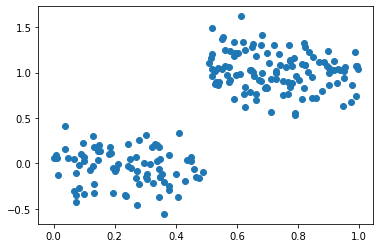

In [49]:
# plot myMat
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(myMat[:,0].flatten().A[0], myMat[:,1].flatten().A[0])
plt.show()


In [29]:
regTrees.createTree(myMat)

{'spInd': 0,
 'spVal': 0.48813,
 'left': 1.0180967672413792,
 'right': -0.04465028571428572}

这里选择到第一列最为最佳的分类特征，分类特征值为0.48813，左树为叶节点 1.0180967672413792， 右树也是叶节点 -0.04465028571428572

# 树剪枝

当树的节点过多时，会出现过拟合现象。可以通过剪枝（pruning）来降低决策树的复杂度，通过选择切分特征和特征值的方法被称为预剪枝（prepruning）；
另一种是后剪枝（postpruning）

## 预剪枝

调整容忍的最小误差和切分最小样本数，一个过拟合的树：

In [30]:
regTrees.createTree(myMat, ops=(0,1))

{'spInd': 0,
 'spVal': 0.48813,
 'left': {'spInd': 0,
  'spVal': 0.620599,
  'left': {'spInd': 0,
   'spVal': 0.625336,
   'left': {'spInd': 0,
    'spVal': 0.625791,
    'left': {'spInd': 0,
     'spVal': 0.643601,
     'left': {'spInd': 0,
      'spVal': 0.651376,
      'left': {'spInd': 0,
       'spVal': 0.6632,
       'left': {'spInd': 0,
        'spVal': 0.683921,
        'left': {'spInd': 0,
         'spVal': 0.819823,
         'left': {'spInd': 0,
          'spVal': 0.837522,
          'left': {'spInd': 0,
           'spVal': 0.846455,
           'left': {'spInd': 0,
            'spVal': 0.919384,
            'left': {'spInd': 0,
             'spVal': 0.976414,
             'left': {'spInd': 0,
              'spVal': 0.985425,
              'left': {'spInd': 0,
               'spVal': 0.989888,
               'left': {'spInd': 0,
                'spVal': 0.993349,
                'left': 1.035533,
                'right': 1.077553},
               'right': {'spInd': 0,
        

In [51]:
myDat2 = regTrees.loadDataSet('ex2.txt')
myMat2 = mat(myDat2)
myMat2[0:4, ]

matrix([[  0.228628,  -2.266273],
        [  0.965969, 112.386764],
        [  0.342761, -31.584855],
        [  0.901444,  87.300625]])

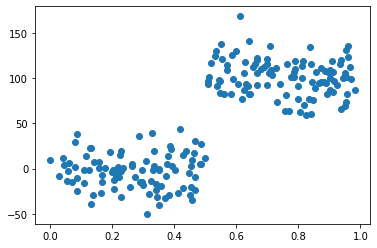

In [52]:
# plot myMat2
# plot myMat
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(myMat2[:,0].flatten().A[0], myMat2[:,1].flatten().A[0])
plt.show()


In [32]:
regTrees.createTree(myMat2)

{'spInd': 0,
 'spVal': 0.499171,
 'left': {'spInd': 0,
  'spVal': 0.729397,
  'left': {'spInd': 0,
   'spVal': 0.952833,
   'left': {'spInd': 0,
    'spVal': 0.958512,
    'left': 105.24862350000001,
    'right': 112.42895575000001},
   'right': {'spInd': 0,
    'spVal': 0.759504,
    'left': {'spInd': 0,
     'spVal': 0.790312,
     'left': {'spInd': 0,
      'spVal': 0.833026,
      'left': {'spInd': 0,
       'spVal': 0.944221,
       'left': 87.3103875,
       'right': {'spInd': 0,
        'spVal': 0.85497,
        'left': {'spInd': 0,
         'spVal': 0.910975,
         'left': 96.452867,
         'right': {'spInd': 0,
          'spVal': 0.892999,
          'left': 104.825409,
          'right': {'spInd': 0,
           'spVal': 0.872883,
           'left': 95.181793,
           'right': 102.25234449999999}}},
        'right': 95.27584316666666}},
      'right': {'spInd': 0,
       'spVal': 0.811602,
       'left': 81.110152,
       'right': 88.78449880000001}},
     'right': 102.

In [34]:
regTrees.createTree(myMat2,ops=(10000,4))

{'spInd': 0,
 'spVal': 0.499171,
 'left': 101.35815937735848,
 'right': -2.637719329787234}

## 后剪枝

首先构建足够大的树，足够复杂，便于剪枝。随后自上而下地寻找叶节点，用测试集判断合并叶节点是否能降低测试误差，如果是则合并。

In [35]:
myTree = regTrees.createTree(myMat2,ops=(0,1))
myDatTest = regTrees.loadDataSet('ex2test.txt')
myMat2Test = mat(myDatTest)
myMat2Test[0:4,]

matrix([[ 0.421862, 10.830241],
        [ 0.105349, -2.241611],
        [ 0.155196, 21.872976],
        [ 0.161152,  2.015418]])

In [36]:
regTrees.prune(myTree, myMat2Test)

merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging


{'spInd': 0,
 'spVal': 0.499171,
 'left': {'spInd': 0,
  'spVal': 0.729397,
  'left': {'spInd': 0,
   'spVal': 0.952833,
   'left': {'spInd': 0,
    'spVal': 0.965969,
    'left': 92.5239915,
    'right': {'spInd': 0,
     'spVal': 0.956951,
     'left': {'spInd': 0,
      'spVal': 0.958512,
      'left': {'spInd': 0,
       'spVal': 0.960398,
       'left': 112.386764,
       'right': 123.559747},
      'right': 135.837013},
     'right': 111.2013225}},
   'right': {'spInd': 0,
    'spVal': 0.759504,
    'left': {'spInd': 0,
     'spVal': 0.763328,
     'left': {'spInd': 0,
      'spVal': 0.769043,
      'left': {'spInd': 0,
       'spVal': 0.790312,
       'left': {'spInd': 0,
        'spVal': 0.806158,
        'left': {'spInd': 0,
         'spVal': 0.815215,
         'left': {'spInd': 0,
          'spVal': 0.833026,
          'left': {'spInd': 0,
           'spVal': 0.841547,
           'left': {'spInd': 0,
            'spVal': 0.841625,
            'left': {'spInd': 0,
            

生成的树还是很大，说明后剪枝效果没预剪枝好

# 模型树

用树对数据建模，除了简单地使用常数值作为叶节点外，还可以使用分段线性函数作为叶节点。

In [53]:
myMat2 = mat(regTrees.loadDataSet('exp2.txt'))
myMat2[0:4,]

matrix([[0.07067 , 3.470829],
        [0.534076, 6.377132],
        [0.747221, 8.949407],
        [0.66897 , 8.034081]])

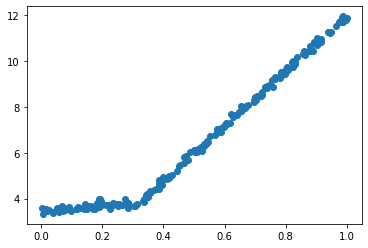

In [54]:
# plot myMat2
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(myMat2[:,0].flatten().A[0], myMat2[:,1].flatten().A[0])
plt.show()


In [38]:
regTrees.createTree(myMat2, regTrees.modelLeaf, regTrees.modelErr, (1,10))

{'spInd': 0,
 'spVal': 0.285477,
 'left': matrix([[1.69855694e-03],
         [1.19647739e+01]]),
 'right': matrix([[3.46877936],
         [1.18521743]])}

# 示例：比较树回归与线性回归


In [39]:
trainMat = mat(regTrees.loadDataSet('bikeSpeedVsIq_train.txt'))
testMat = mat(regTrees.loadDataSet('bikeSpeedVsIq_test.txt'))

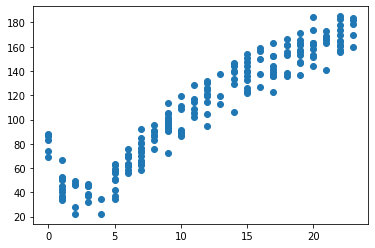

In [55]:
# plot trainMat
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(trainMat[:,0].flatten().A[0], trainMat[:,1].flatten().A[0])
plt.show()


In [41]:
# 回归树
myTree = regTrees.createTree(trainMat, ops=(1,20))
yHat = regTrees.createForeCast(myTree, testMat[:, 0])
corrcoef(yHat, testMat[:,1], rowvar=0)[0,1]

0.964085231822215

In [42]:
# 模型树
myTree = regTrees.createTree(trainMat, regTrees.modelLeaf, regTrees.modelErr, (1,20))
yHat = regTrees.createForeCast(myTree, testMat[:, 0], regTrees.modelTreeEval)
corrcoef(yHat, testMat[:,1], rowvar=0)[0,1]

0.9760412191380619

In [43]:
# 线性回归
ws,X,Y = regTrees.linearSolve(trainMat)
ws

matrix([[37.58916794],
        [ 6.18978355]])

In [44]:
for i in range(shape(testMat)[0]):
    yHat[i] = testMat[i,0] * ws[1,0] + ws[0,0]

In [45]:
corrcoef(yHat, testMat[:,1], rowvar=0)[0,1]

0.9434684235674767

比较上述三者R2，模型树对复杂数据建模的效果最佳。

# 小结

- 树回归可处理复杂、非线性的数据关系

- 剪枝可以降低树的复杂度